In [ ]:
#from blockchain import util

In [1]:
import requests, json

## CoinAPI API-key

In [2]:
headers = {'X-CoinAPI-Key' : '1D72029F-312C-4C15-BCFD-75BBD7BD06F8'}

### Current Exchange Rate

In [ ]:
#urlExchangeRate = 'https://rest.coinapi.io/v1/exchangerate'
#urlBTCvsALL = '%s/BTC' % (urlExchangeRate)
#urlETHvsALL = '%s/ETH' % (urlExchangeRate)
#urlBTCvsUSD = '%s/USD' % (urlBTCvsALL)
#urlBTCvsKRW = '%s/KRW' % (urlBTCvsALL)
#urlETHvsKRW = '%s/KRW' % (urlETHvsALL)
######################################

#BTCvsALL = requests.get(urlBTCvsALL, headers = headers)
#ETHvsALL = requests.get(urlETHvsALL, headers = headers)
#ETHvsKRW = requests.get(urlETHvsKRW, headers = headers)
#BTCvsKRW = requests.get(urlBTCvsKRW, headers = headers)

## Fetching trading history

In [3]:
# Sampling : 2012년부터 현재까지 10일 단위
# 

def fetch_History(_period = "10DAY", _start_time = "2012-01-01T00:00:00", _end_time = "2018-07-23T00:00:00"):
    urlHistoric = 'https://rest.coinapi.io/v1/ohlcv/BITSTAMP_SPOT_BTC_USD/history?period_id=%s&time_start=%s&time_end=%s' %(_period, _start_time, _end_time)
    del _start_time, _end_time, _period
    BTCvsUSD_history = requests.get(urlHistoric, headers = headers)
    del urlHistoric
    return BTCvsUSD_history

# REST API로 불러온 JSON을 dictionary형태로 가공
def StrToDict(rawStr, dictList=[]):
    strform = rawStr.replace("\r\n", "")
    dictform = json.loads(strform)
    del strform
    dictList = dictList + dictform
    del dictform
    return dictList

In [4]:
# 최대 100개의 데이터만 받아올 수 있으므로 여러번 호출해서 Appending
History = fetch_History()
dictTest = StrToDict(History.text, [])
del History
History = fetch_History(_start_time = "2014-09-30T00:00:00")
dictTest = StrToDict(History.text, dictTest)
del History
History = fetch_History(_start_time = "2017-06-25T00:00:00")
dictTest = StrToDict(History.text, dictTest)
del History

In [18]:
dictTest

## [ {}, {}, {}, {}   ] 형태로 되어 있어서 pandas DataFrame으로 바꾸기 편하다

[{'price_close': 6.65,
  'price_high': 6.65,
  'price_low': 4.58,
  'price_open': 4.58,
  'time_close': '2012-01-05T23:46:01.0000000Z',
  'time_open': '2012-01-01T04:16:14.0000000Z',
  'time_period_end': '2012-01-06T00:00:00.0000000Z',
  'time_period_start': '2011-12-27T00:00:00.0000000Z',
  'trades_count': 61,
  'volume_traded': 330.72237041},
 {'price_close': 7.15,
  'price_high': 7.38,
  'price_low': 6.0,
  'price_open': 6.65,
  'time_close': '2012-01-15T10:30:20.0000000Z',
  'time_open': '2012-01-06T06:02:28.0000000Z',
  'time_period_end': '2012-01-16T00:00:00.0000000Z',
  'time_period_start': '2012-01-06T00:00:00.0000000Z',
  'trades_count': 224,
  'volume_traded': 438.50391915},
 {'price_close': 6.31,
  'price_high': 7.1,
  'price_low': 5.52,
  'price_open': 6.2,
  'time_close': '2012-01-25T21:37:14.0000000Z',
  'time_open': '2012-01-16T15:50:54.0000000Z',
  'time_period_end': '2012-01-26T00:00:00.0000000Z',
  'time_period_start': '2012-01-16T00:00:00.0000000Z',
  'trades_count':

In [7]:
#dictETH = StrToDict(ETHvsKRW.text)
#dictBTC = StrToDict(BTCvsKRW.text)

In [5]:
import pandas as pd

In [19]:
#DF = pd.DataFrame(dictform['rates'])
#DF = pd.DataFrame([dictETH, dictBTC])
#DF

,asset_id_base,asset_id_quote,rate,time
0,ETH,KRW,5.220937e+05,2018-07-23T05:46:31.0776555Z
1,BTC,KRW,8.580076e+06,2018-07-23T05:46:31.9058025Z


In [6]:
DF = pd.DataFrame(dictTest)

In [20]:
DF

,price_close,price_high,price_low,price_open,time_close,time_open,time_period_end,time_period_start,trades_count,volume_traded
0,6.65,6.65,4.58,4.58,2012-01-05T23:46:01.0000000Z,2012-01-01T04:16:14.0000000Z,2012-01-06T00:00:00.0000000Z,2011-12-27T00:00:00.0000000Z,61,330.722370
1,7.15,7.38,6.00,6.65,2012-01-15T10:30:20.0000000Z,2012-01-06T06:02:28.0000000Z,2012-01-16T00:00:00.0000000Z,2012-01-06T00:00:00.0000000Z,224,438.503919
2,6.31,7.10,5.52,6.20,2012-01-25T21:37:14.0000000Z,2012-01-16T15:50:54.0000000Z,2012-01-26T00:00:00.0000000Z,2012-01-16T00:00:00.0000000Z,207,993.326903
3,5.94,6.50,3.80,6.27,2012-02-04T22:49:47.0000000Z,2012-01-26T14:33:41.0000000Z,2012-02-05T00:00:00.0000000Z,2012-01-26T00:00:00.0000000Z,372,743.614427
4,4.89,6.15,4.56,5.93,2012-02-14T20:56:35.0000000Z,2012-02-05T00:21:04.0000000Z,2012-02-15T00:00:00.0000000Z,2012-02-05T00:00:00.0000000Z,226,881.392187
5,4.95,5.22,4.14,4.90,2012-02-24T20:24:04.0000000Z,2012-02-15T12:33:26.0000000Z,2012-02-25T00:00:00.0000000Z,2012-02-15T00:00:00.0000000Z,428,2277.295521
6,5.05,5.11,4.60,5.11,2012-03-05T23:43:40.0000000Z,2012-02-25T08:22:23.0000000Z,2012-03-06T00:00:00.0000000Z,2012-02-25T00:00:00.0000000Z,363,2446.958524
7,5.39,5.44,4.84,5.00,2012-03-15T22:45:23.0000000Z,2012-03-06T05:09:39.0000000Z,2012-03-16T00:00:00.0000000Z,2012-03-06T00:00:00.0000000Z,459,4019.333725
8,4.54,5.42,4.54,5.30,2012-03-25T13:54:58.0000000Z,2012-03-16T06:11:32.0000000Z,2012-03-26T00:00:00.0000000Z,2012-03-16T00:00:00.0000000Z,308,2415.066358
9,5.01,5.04,4.54,4.60,2012-04-04T20:22:36.0000000Z,2012-03-26T03:53:27.0000000Z,2012-04-05T00:00:00.0000000Z,2012-03-26T00:00:00.0000000Z,487,3029.993619


## Macroeconomic indicators

In [2]:
import tradingeconomics as te
te.login()

'You are logged in as a guest:guest'

In [3]:
te.getIndicatorData(country=['united states', 'china'], output_type='df')

,Country,Category,LatestValue,LatestValueDate,Source,Unit,CategoryGroup,Frequency,PreviousValue,PreviousValueDate
0,United States,ADP Employment Change,177.00,2018-06-30T00:00:00,"Automatic Data Processing, Inc.",Thousand,Labour,Monthly,189.00,2018-05-31T00:00:00
1,United States,API Crude Oil Stock Change,-3.16,2018-07-20T00:00:00,American Petroleum Institute (API),BBL/1Million,Business,Weekly,0.63,2018-07-13T00:00:00
2,United States,Asylum Applications,6901.00,2018-04-30T00:00:00,United Nations Refugee Agency,Persons,Government,Monthly,10167.00,2017-12-31T00:00:00
3,United States,Average Hourly Earnings,0.20,2018-06-30T00:00:00,U.S. Bureau of Labor Statistics,percent,Labour,Monthly,0.30,2018-05-31T00:00:00
4,United States,Average Weekly Hours,34.50,2018-06-30T00:00:00,U.S. Bureau of Labor Statistics,Hours,Labour,Monthly,34.50,2018-05-31T00:00:00
5,China,Balance of Trade,416.13,2018-06-30T00:00:00,General Administration of Customs,USD HML,Trade,Monthly,249.22,2018-05-31T00:00:00
6,United States,Balance of Trade,-43053.00,2018-05-31T00:00:00,U.S. Census Bureau,USD Million,Trade,Monthly,-46081.00,2018-04-30T00:00:00
7,China,Bank Lending Rate,4.35,2018-06-30T00:00:00,People's Bank of China,percent,Consumer,Monthly,4.35,2018-05-31T00:00:00
8,United States,Bank Lending Rate,4.89,2018-06-30T00:00:00,Federal Reserve,percent,Consumer,Monthly,4.75,2018-05-31T00:00:00
9,United States,Bankruptcies,23106.00,2018-03-31T00:00:00,Administrative Office of the U.S. Courts,Companies,Business,Quarterly,23157.00,2017-12-31T00:00:00


In [9]:
import quandl
quandl.ApiConfig.api_key = "aCgdcxbU99AzFzmfass1"

In [13]:
US_Crude_Oil_data = quandl.get("EIA/PET_RWTC_D", start_date="2012-01-01", end_date="2018-07-23")
US_Government_Interest_rate = quandl.get("FRED/DTB3", start_date="2012-01-01", end_date="2018-07-23")
US_Treasury_Yield = quandl.get("USTREASURY/YIELD", start_date="2012-01-01", end_date="2018-07-23")

## Visualization

In [7]:
import matplotlib.pyplot as plt
from mpl_finance import plot_day_summary_oclh

In [ ]:
fig, ax = plt.subplots()
plot_day_summary_oclh(ax, zip(DF['time_close'], DF['price_open'], DF['price_close'], DF['price_low'], DF['price_high']), ticksize=3)

ax.autoscale_view()
ax.xaxis.grid(True, 'major')
ax.grid(True)
fig.autofmt_xdate()
plt.show()

### plot.ly : interactive chart

In [8]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='quarklep', api_key='fWJFKjeXE1ZasIc9kpYp')
from datetime import datetime
trace = go.Ohlc(x=DF['time_close'], open=DF['price_open'],high=DF['price_high'],low=DF['price_low'], close=DF['price_close'])
data = [trace]
layout = {
    'title': 'Bitcoin Price Developments (10 days period)',
    'yaxis': {'title': 'USD'},
    'shapes': [{
        'x0': '2013-10-26', 'x1': '2013-10-26',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }, {
        'x0': '2017-03-05', 'x1': '2017-03-05',
        'y0': 0, 'y1': 1, 'xref': 'x', 'yref': 'paper',
        'line': {'color': 'rgb(30,30,30)', 'width': 1}
    }],
    'annotations': [{
        'x': '2013-10-26', 'y': 0.5, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Boom Phase Begins'
    }, {
        'x': '2017-03-05', 'y': 0.5, 'xref': 'x', 'yref': 'paper',
        'showarrow': False, 'xanchor': 'left',
        'text': 'Euphoria Phase Begins'
    }
    ]
}
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='simple_ohlc')

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



[  0  50 100 150 200]


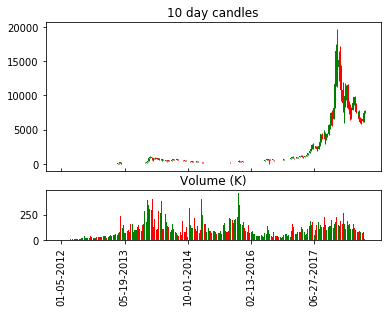

In [9]:
from custom_candlestick import plot_candles
plot_candles(DF, title='10 day candles', volume_bars=True)

## Database 구축

In [20]:
import MySQLdb

In [21]:
# local computer에 설치되어 있는 MySQL과 연동
db = MySQLdb.connect(host='localhost', user='quarklep', passwd='quarklep', db='coin_price')
cur = db.cursor()

In [ ]:
cur.execute("")